# Introduction to Supervised Learning: the Bivariate Linear Model

## Background

We begin with a simple but straightforward approach for supervised learning: the bivariate linear model.  Why do we start with something so "unsexy"?  Some thoughts:

1. Linear regression remains a useful and powerful tool for statistical learning and prediction.  It has been around for a very long time and is the topic of a multitude of textbooks.  

2. It serves as a useful place to start as we build our toolkit of applied statistical learning techniques.  Indeed, many of the tools we will talk about are generalizations of linear regression, so a thorough understanding of it is important.

3. The linear model can be expressed as a optimization problem with a closed-form solution, which makes it computationally tractible.  (You can do it by hand if you had to.)

4. Empirical studies that are focused less on prediction and more on measuring the impact of a change in a feature on some outcome of interest still dominate policy-making.  Indeally, policy-makers are interested in evaluating the impact of, say, an additional year of education on wages when making policy about subsidizing education.  Is the effect different than zero?  If so, is it large and accurately measured?  Is the effect the same over different ages or cohorts?

5. A linear model is a first-order Taylor approximation to a higher-order relation.  In the days of expensive computing, we convinced ourselves that so-called "higher order terms" or "HOT" were not interesting or relevant.  (We know that's not the case now.)  Besides, many of the obstacles we face in accurate statistical learning, such as omitted variable bias, impact our entire toolkit, including linear models.

## A Very Brief History
For succinct discussions, see https://www.utdallas.edu/~herve/Abdi-LeastSquares06-pretty.pdf and http://www.amstat.org/publications/jse/v9n3/stanton.html.

Highlights: 

1. In the early 1800's, mathematicians Gauss and Legendre published on the Method of Least Squares.  (Gauss claims he was there first in the late 1700's.)  

2. Galton published actual empirical work in 1886.

3. The Bayesian/frequentist schism regarding the interpretation of statistics commences the work of Fisher, Neyman, and the Pearsons in 1920's (to which we will return).

3. One of the first complete textbooks that I know of is Edward Malinvaud, Statistical Methods of Econometrics, Rand McNally & Company, 1966.  (A smelly copy of which I recently bought on Amazon upon Malinvaud's death.)

## An Explanatory Model in Supervised Learning

Consider the follow relation: $y=f(x)$.

$x$ has several different names: 
1. an explanatory variable
2. a predictor
3. a feature

$y$ is a quantitative response, which also has several different names:
1. a dependent variable
2. an outcome
3. a label

$f$ is a mapping from $x$ to $y$ that captures the relation between the two.  It could be linear, non-linear, or discontinuous.  The nature of $f$ is the supervision we provide the computer in statistical learning.  To begin with, we instruct the computer that $f$ is linear.  Namely,

$y=\beta_0 + \beta_1 \cdot x$

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


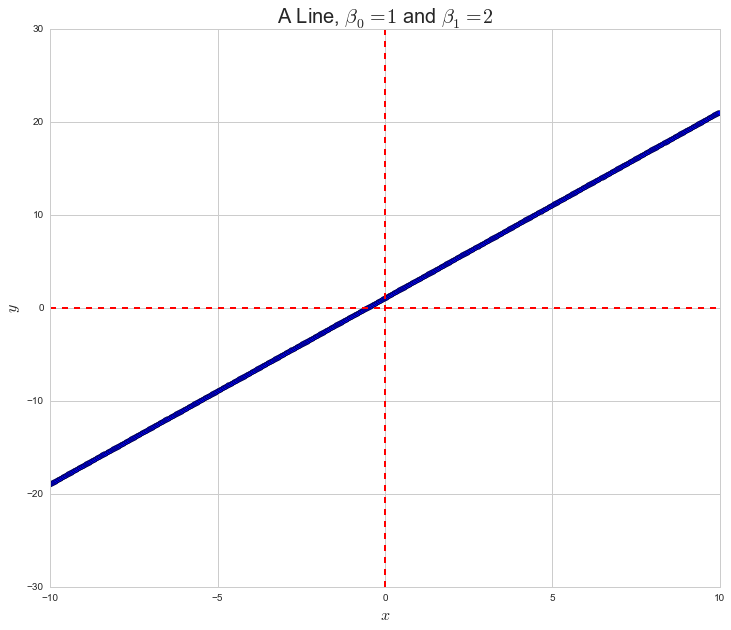

In [10]:
x = linspace(-10, 10, 1000)
y = 1 + 2 * x

plt.figure(figsize = (12, 10))
plt.scatter(x=x, y=y)
plt.xlim(-10,10)
plt.title(r'A Line, $\beta_0=1$ and $\beta_1=2$', fontsize=20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.axvline(0, color='r', ls='--', lw=2.0)
plt.axhline(0, color='r', ls='--', lw=2.0)

This line is an abstraction that allows us to focus.  We do not expect from any real-world data that every possible pair $(x, y)$ to lie on this line.  Therefore, we summarize our ignorance in a fudge factor, namely:

$y=\beta_0 + \beta_1 \cdot x + \epsilon$

Why the $\epsilon$?

1. It captures the combined effect of other features that we may or may not know.
2. It captures the approximation error (or higher order terms).
3. It captures the purely random component that exists at the level of an individual observation in data (i.e., fundamental unpredictabilty).  

If we have a dataset of size $i=1,...,N$, we can write the model as:

$y_i=\beta_0 + \beta_1 \cdot x_i + \epsilon_i$

And this returns us to a scatter plot.

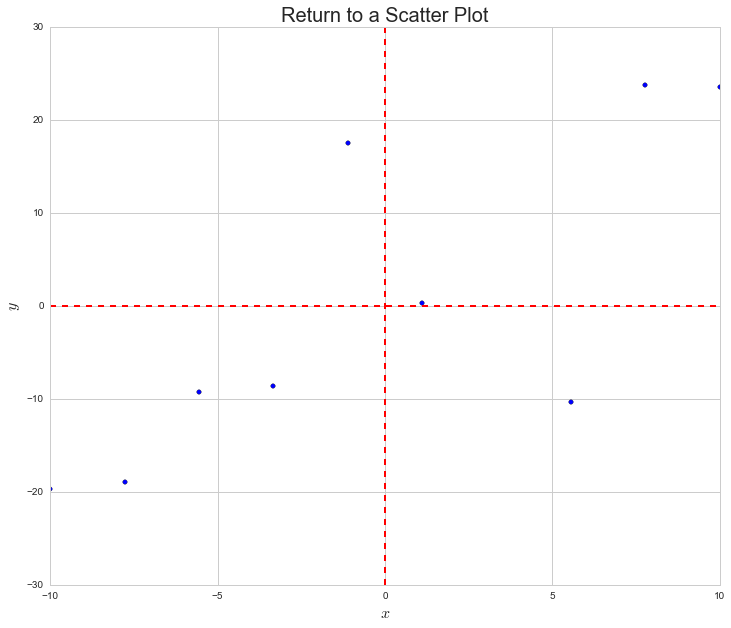

In [17]:
x = linspace(-10, 10, 10)
y = 1 + 2 * x + np.random.normal(0, 10, 10)

plt.figure(figsize = (12, 10))
plt.scatter(x=x, y=y)
plt.xlim(-10,10)
plt.ylim(-30,30)
plt.title(r'Return to a Scatter Plot', fontsize=20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.axvline(0, color='r', ls='--', lw=2.0)
plt.axhline(0, color='r', ls='--', lw=2.0)

## Optimization and the Sum of Squared Residuals

Now, in the real world, we start with the data.  Suppose we use a supervised linear model.  How best to fit those data?  We can imbed this into an optimization problem, namely the minimization of a convex surface, applying the principle of least squares.

Denote $\epsilon_i$ to be a residual.  Define the following convex surface, the sum of squared residuals:

$SSR(\beta_0,\beta_1) = \sum_i \epsilon_i^2=\sum_i \left(y_i-\beta_0 - \beta_1 \cdot x_i\right)^2$

The goal is to minimize the SSR with respect to $\beta_0$ and $\beta_1$.  That is, choose $\hat\beta_0$ and $\hat\beta_1$ such that $SSR(\hat\beta_0, \hat\beta_1$) is minimized.

How does this SSR surface appear?

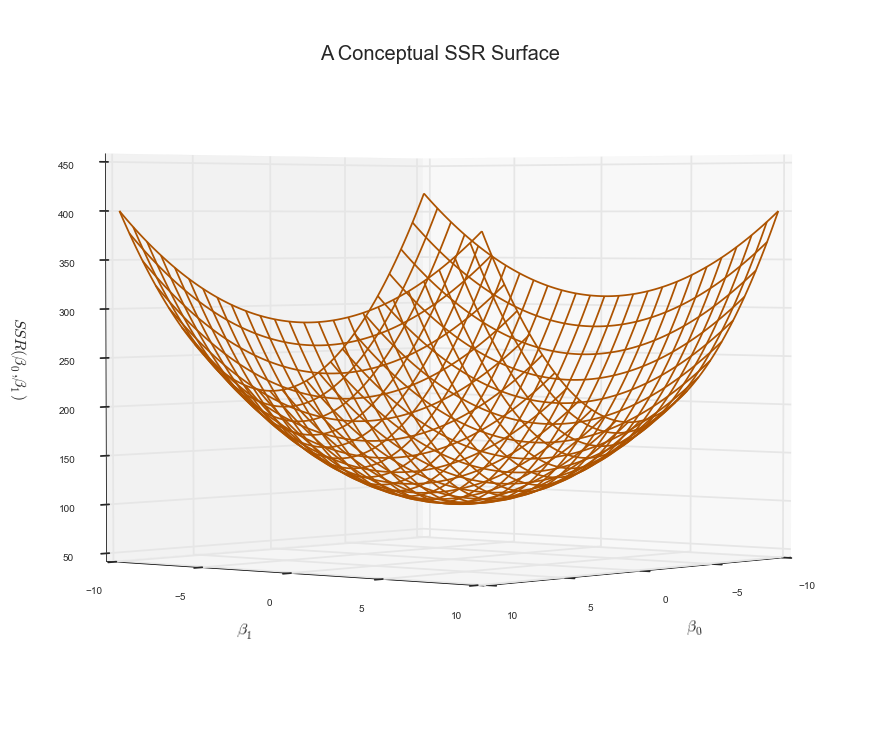

In [25]:
# A conceptual SSR surface.  Increase the first argument in ax.view_init() to provide a different perspective.

b0 = linspace(-10,10,100)
b1 = linspace(-10,10,100)
b0, b1 = meshgrid(b0, b1)
rss = -1*(-2 * b0**2 - b1**2 + b0 + b1 - 100)

fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
ax.plot_wireframe(b0, b1, rss, rstride=4, cstride=4, color='#AD5300')
ax.view_init(2,40)
ax.set_title('A Conceptual SSR Surface', fontsize=20)
ax.set_xlabel(r'$\beta_0$', fontsize = 16)
ax.set_ylabel(r'$\beta_1$', fontsize = 16)
ax.set_zlabel(r'$SSR(\beta_0, \beta_1)$', fontsize = 16)

Let $\overline{x}=\frac{1}{N}\sum_i x_i$ be the sample mean of x and $\overline{y}=\frac{1}{N}\sum_i y_i$ be the sample mean of y.  Some calculus and algebraic manipulation yields the following:

$\hat\beta_1 = \displaystyle{\frac{\sum_i(y_i-\overline{y})(x_i-\overline{x})}{\sum_i(x_i-\overline{x})^2} = \frac{Cov(x,y)}{Var(x)}}$

$\hat\beta_0 = \overline{y} - \hat\beta_1 \cdot \overline{x} \rightarrow \overline{y}=\hat\beta_0 +  \hat\beta_1 \cdot \overline{x}$

In [26]:
# Least squares as a minimization problem.

import numpy as np
import statsmodels.api as sm
from scipy.optimize import minimize

In [32]:
# Generate some fake data.  
# obs is number of observations.
# params is the number of parameters to be estimated ignoring the constant.  
# It is adjusted to include a constant using statsmodels "add_constant"

obs = 1000
params = 1

params = params + 1
beta = np.random.randn(params, 1)
beta0 = np.zeros((params, 1))
X = np.random.randn(obs, params-1)
X = sm.add_constant(X)
y = np.dot(X, beta) + np.random.randn(obs, 1)

In [33]:
# This is least squares using BFGS to recover the covariance matrix.  
# b is beta.  y and X are endog and exog respectively passed to the function.
# Scratch space for beta is necessary.

def func(b, y, X, obs, params):
    bv = b.view()
    bv.shape = params, 1
    e = y - np.dot(X, bv)
    return np.array(np.sum(e**2))

def func_grad(b, y, X, obs, params):
    bv = b.view()
    bv.shape = params, 1
    foc = -np.sum(X * (y - np.dot(X, bv)), axis=0)
    return np.array(foc)

res = minimize(func, beta0, args=(y, X, obs, params), method='BFGS', 
               jac=func_grad, options={'disp': True, 'maxiter':1000})

Optimization terminated successfully.
         Current function value: 1042.814304
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11


In [34]:
# Extract relevant results: betahat, covariance matrix, standard errors, and t-statistics.

betahat = res.x.reshape((params, 1))
e = y - np.dot(X, betahat)
s2 = np.dot(np.transpose(e), e)/(obs - params)
cov = s2*res.hess_inv

se, t = np.zeros((params, 1)), np.zeros((params, 1))

for i in range(0, params):
    se[i] = np.sqrt(cov[i,i])
    t[i] = res.x[i]/np.sqrt(cov[i,i])

In [35]:
# Display beta from the DGP, betahats, their standard errors, and their t-statistics.

print beta
print betahat
print se
print t

[[-0.20470766]
 [ 0.47894334]]
[[-0.18741555]
 [ 0.53133914]]
[[ 0.03233322]
 [ 0.03297685]]
[[ -5.79637709]
 [ 16.11248932]]


# Bivariate Model Homework

The Python code above expresses the bivariate model as a minimization problem.  Run the code a few times to demonstrate that the model minimizes without any issues.  For example, increase the sample size.  What happens to the t-statistics as the sample size grows?